# Table of Contents
* &nbsp;
	* [The Discrete Fourier Transform](#The-Discrete-Fourier-Transform)
		* [The Discrete Fourier Transform: Sampling the discrete-time Fourier transform](#The-Discrete-Fourier-Transform:-Sampling-the-discrete-time-Fourier-transform)
		* [The DFT as a change of basis](#The-DFT-as-a-change-of-basis)
		* [Time-shift property](#Time-shift-property)
		* [Circular convolution](#Circular-convolution)


In [3]:
%run nbinit.ipy

... Configuring matplotlib formats
... Configuring matplotlib with inline figures
... Importing numpy as np, scipy as sp, pyplot as plt, scipy.stats as stats
   ... scipy.signal as sig
... Importing widgets, display, HTML, Image, Javascript
... Some LaTeX definitions


... Defining figures captions 


... Loading customized Javascript for interactive solutions (show/hide)


## The Discrete Fourier Transform

From the periodization-discretization duality, we can return to the notion of Discrete Fourier Transform (\ref{eq:DFT}) we introduced in section \ref{def:DFT}. Recall that the DFT is Fourier transform that appears when we assume that the signal is periodic out of the observation interval (an other option is to assume that the signal is zero outside of the observation interval, and this leads to the discrete-time Fourier transform). Since the signal is considered periodic, it can be expressed as a Fourier series, and this leads to the pair of formulas recalled here for convenience
\begin{equation}
\eqboxc{\begin{aligned}
x(n) &= \sum_{k=0}^{N-1} X(k)  e^{j2\pi\frac{ k n}{N}}\\
\text{with   }
X(k) &= \frac{1}{N}\sum_{n=0}^{N-1} x(n)  e^{-j2\pi\frac{ k n}{N}}.
\end{aligned}
}
\label{eq:DFTbis}
\end{equation}
In this section, we show that the DFT can also be viewed as a sampled version of the discrete-time Fourier transform or as a simple change of basis for signal representation. We indicate that the assumption of periodized signal in the time-domain implies some caution when studying some properties of the DFT, namely time shifts or convolution. 

### The Discrete Fourier Transform: Sampling the discrete-time Fourier transform

Given what we learned before, it is very easy to see that the DFT is indeed a sampled version of the discrete-time Fourier transform. We know that periodizing a signal can be interpreted as a convolution of a pattern with a Dirac comb. In turn, this implies in the frequency domain a multiplication of the Fourier transform of the initial pattern with a Dirac comb: if we denote $x_0(n)$ the signal for $n\in[0,N)$, 
$$
x(n) = [x_0*\sha_N](n)
$$
and
\begin{align}
X(f) & = X_0(f) .  \frac{1}{N}\sha_\frac{1}{N}(f) \\
& = X_0(f) . \frac{1}{N} \sum_{k=0}^{N-1} \delta\left(f-\frac{k}{N}\right)  \\
& =  \frac{1}{N} \sum_{k=0}^{N-1} X_0\left(\frac{k}{N}\right) \delta\left(f-\frac{k}{N}\right)  \\
\end{align}
Then, the expression of $x(n)$ as an inverse Fourier  transform becomes
\begin{align}
x(n) & = \int_{[1]} X(f) e^{j2\pi fn} \dr{f} \\
& = \frac{1}{N} \sum_{k=0}^{N-1}  X_0\left(\frac{k}{N}\right) \int_{[1]}  e^{j2\pi fn} \delta\left(f-\frac{k}{N}\right) \dr{f} \\
& = \frac{1}{N} \sum_{k=0}^{N-1} X_0\left(\frac{k}{N}\right) e^{j2\pi \frac{kn}{N}}
\end{align}
since the integration with the Dirac distribution yields the value of the function for the argument where the Dirac is nonzero. It simply remains to note that 
\begin{align}
X_0\left(f=\frac{k}{N}\right) & = \sum_{n=-\infty}^{+\infty} x_0(n) e^{-j2\pi \frac{kn}{N}}\\
& = \sum_{n=0}^{N-1} x_0(n) e^{-j2\pi \frac{kn}{N}}\\
\end{align}
since $x(n)=x_0(n)$ on the interval $[0,N)$. Denoting $X(k)=X_0\left(f=\frac{k}{N}\right)$, we arrive at the formulas (\ref{eq:DFTbis}) for the DFT.  

We illustrate this numerically. We look at the Fourier transform of a sine wave, with and without zero-padding. In the first case, we obtain something that represents the discrete-time Fourier transform, and which exhibits the consequence of the time-limitation of the signal. In the second case, we obtain the samples of the DFT. 

(0, 0.3)

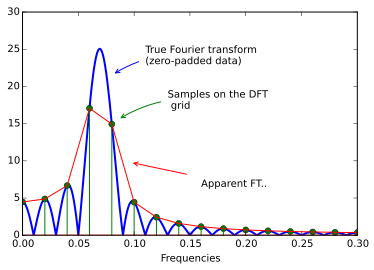

In [2]:

##
# experiments on DFT: the DFT as sampled FT
N=50        # Fourier resolution: 1/N
fo=0.07     # not on the Fourier grid
t=arange(N)
s=sin(2*pi*fo*t)  
Sz=fft(s,1000)
f=arange(1000)/1000
plot(f,abs(Sz),lw=2, color="blue")
S=fft(s)
f2=arange(N)/N
stem(f2,abs(S),lw=2,linefmt='g-', markerfmt='go')
plot(f2,abs(S),'r-')
xlabel("Frequencies")

# Here we play with annotations and arrows...
annotate("True Fourier transform \n(zero-padded data)", xy=(0.075,21), xytext=(0.11,23),
         arrowprops=dict(arrowstyle="->",
                         color="blue",
         connectionstyle="arc3,rad=0.2",
         shrinkA=5, shrinkB=10))

annotate("Samples on the DFT\n grid", xy=(0.08,15), xytext=(0.13,17),
         arrowprops=dict(arrowstyle="->",
                         color="green",
         connectionstyle="arc3,rad=0.2",
         shrinkA=5, shrinkB=10))
annotate("Apparent FT..", xy=(0.09,10), xytext=(0.16,6.5),
         arrowprops=dict(arrowstyle="->",
                         color="red",
         connectionstyle="arc3,rad=-0.0",
         shrinkA=15, shrinkB=10))
xlim([0, 0.3])

Thus we note that without caution and analysis, it is easy to be mistaken. A zero-padding -- i.e. compute the FT padded with zeros, often enable to avoid bad interpretations. 

### The DFT as a change of basis

A signal known on $N$ samples can be seen as a vector in a $N$-dimensional space. Of course it can be written as
$$
\mathbf{x} = \begin{bmatrix} x(0) \\ x(1) \\ \vdots \\ x(N-1) \end{bmatrix} = x(0)\begin{bmatrix} 1 \\ 0 \\ \vdots \\ 0 \end{bmatrix} + x(1) \begin{bmatrix} 0 \\ 1 \\ \vdots \\ 0 \end{bmatrix} + \ldots +x(N-1)\begin{bmatrix} 0 \\ 0 \\ \vdots \\ 1 \end{bmatrix}.
$$
The vectors of complex exponentials 
$$\mathbf{e_k} = \frac{1}{\sqrt{N}}\begin{bmatrix} 1, e^{-j2\pi \frac{k}{N}},  \ldots,  e^{-j2\pi \frac{kl}{N}}, \ldots, e^{-j2\pi \frac{k(N-1)}{N}} \end{bmatrix}^T$$
also for a basis of the same space. It is a simple exercise to check that $\mathbf{e_k}^T\mathbf{e_l}=\delta(k-l)$. Thus it is possible to express $\mathbf{x}$ in the basis of complex exponentials. The coordinate $X(k)$ of  $\mathbf{x}$ on the vector $\mathbf{e_k}$ is given by the scalar product $\mathbf{e_k}^+\mathbf{x}$, where $^+$ denotes transposition and  complex conjugation.  If we denote
$$
\mathbf{F} =  \begin{bmatrix} \mathbf{e_0}, \mathbf{e_1}, \ldots  \mathbf{e_{N-1}} \end{bmatrix} $$
the **Fourier matrix**, then we can note that $\mathbf{F}^+\mathbf{F}=\mathbf{1}$, which means that $\mathbf{F}$ is a unitary matrix -- and that in particular $\mathbf{F}^{-1}=\mathbf{F}^+$.
Then, the change of basis to the basis of exponentials can be expressed as
\begin{equation}
\mathbf{X} = \mathbf{F}^+ \mathbf{x}
\label{eq:DFT_Fmatrix}
\end{equation}
and $\mathbf{x}$ can be expressed in  terms of the $X(k)$ as
\begin{equation}
\mathbf{x} = \mathbf{F} \mathbf{X}.
\label{eq:iDFT_Fmatrix}
\end{equation}
Developing line $k$ of (\ref{eq:DFT_Fmatrix}), we obtain
$$
X(k) = \frac{1}{\sqrt{N}}\sum_{n=0}^{N-1} x(n)  e^{-j2\pi\frac{ k n}{N}},
$$
and developing line $n$ of (\ref{eq:iDFT_Fmatrix}), we obtain
$$
x(n) = \frac{1}{\sqrt{N}}\sum_{k=0}^{N-1} X(k)  e^{j2\pi\frac{ k n}{N}}.
$$
Up to a simple factor (let eg $X'(k) = \frac{1}{\sqrt{N}}X(k)$) we recover the formulas (\ref{eq:DFTbis}) of the  DFT. 

### Time-shift property

... to be completed

### Circular convolution

... to be completed


----
<div align=right> [Index](toc.ipynb) - [Back](Periodization_discretization.ipynb) - [Next](Sampling.ipynb)</div>